   # FitBit Fitness Tracker

### About a company
Bellabeat, a high-tech manufacturer of health-focused products for women. Bellabeat is a successful small company, but they have the potential to become a larger player in the global smart device market. Urška Sršen, cofounder and Chief Creative Officer of Bellabeat, believes that analyzing smart device fitness data could help unlock new growth opportunities for the company.

### Questions for the analysis
1. What are some trends in smart device usage?
2. How could these trends apply to Bellabeat customers?
3. How could these trends help influence Bellabeat marketing strategy

### Business task
Identify potential opportunities for growth and recommendations for the Bellabeat marketing strategy improvement based on trends in smart device usage.

# 1. Loading packages

In [1]:
library(tidyverse)
library(lubridate)
library(dplyr)
library(ggplot2)
library(tidyr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# 2. Importing datasets
We will use FitBit Fitness Tracker [Data](http://).

In [2]:
# Import files:

activity <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
sleep <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
weight <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")

# 3. Explore datasets

In [3]:
# Observe the first rows of the data:

head(activity)
head(sleep)
head(weight)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<chr>,<int>,<int>,<int>
1,1503960366,4/12/2016 12:00:00 AM,1,327,346
2,1503960366,4/13/2016 12:00:00 AM,2,384,407
3,1503960366,4/15/2016 12:00:00 AM,1,412,442
4,1503960366,4/16/2016 12:00:00 AM,2,340,367
5,1503960366,4/17/2016 12:00:00 AM,1,700,712
6,1503960366,4/19/2016 12:00:00 AM,1,304,320


,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
,<dbl>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<dbl>
1,1503960366,5/2/2016 11:59:59 PM,52.6,115.9631,22,22.65,True,1.462234e+12
2,1503960366,5/3/2016 11:59:59 PM,52.6,115.9631,NA,22.65,True,1.462320e+12
3,1927972279,4/13/2016 1:08:52 AM,133.5,294.3171,NA,47.54,False,1.460510e+12
4,2873212765,4/21/2016 11:59:59 PM,56.7,125.0021,NA,21.45,True,1.461283e+12
5,2873212765,5/12/2016 11:59:59 PM,57.3,126.3249,NA,21.69,True,1.463098e+12
6,4319703577,4/17/2016 11:59:59 PM,72.4,159.6147,25,27.45,True,1.460938e+12


In [4]:
# Check the column names in the files:

colnames(activity)
colnames(sleep)
colnames(weight)

[1] "Id"                       "ActivityDate"            
 [3] "TotalSteps"               "TotalDistance"           
 [5] "TrackerDistance"          "LoggedActivitiesDistance"
 [7] "VeryActiveDistance"       "ModeratelyActiveDistance"
 [9] "LightActiveDistance"      "SedentaryActiveDistance" 
[11] "VeryActiveMinutes"        "FairlyActiveMinutes"     
[13] "LightlyActiveMinutes"     "SedentaryMinutes"        
[15] "Calories"

[1] "Id"                 "SleepDay"           "TotalSleepRecords" 
[4] "TotalMinutesAsleep" "TotalTimeInBed"

[1] "Id"             "Date"           "WeightKg"       "WeightPounds"  
[5] "Fat"            "BMI"            "IsManualReport" "LogId"

In [5]:
# How many unique participants are there in the data frames?

n_distinct(activity$Id)
n_distinct(sleep$Id)
n_distinct(weight$Id)

[1] 33

[1] 24

[1] 8

Conclusion:
1. Dataset “activity” has 33 participants, dataset “sleep” has 24 and “weight” only has 8 participants. We cannot use “weight” dataset. The number of the participants it has is not sufficient to draw conclusions.

# 4. Clean datasets and merge

In [6]:
# Remove unnecessary columns:

activity <- activity %>%
  select(-c("TrackerDistance" , "LoggedActivitiesDistance", "SedentaryActiveDistance"))

sleep <- sleep %>%
  select(-c("TotalSleepRecords"))

In [7]:
# Rename columns in the datasets (to make them consistant before merging):

activity <- rename(activity, Date = ActivityDate)
sleep <- rename(sleep, Date = SleepDay)

In [8]:
# Check the data types in the datasets: 

str(activity)
str(sleep)

'data.frame':	940 obs. of  12 variables:
 $ Id                      : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ Date                    : chr  "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ TotalSteps              : int  13162 10735 10460 9762 12669 9705 13019 15506 10544 9819 ...
 $ TotalDistance           : num  8.5 6.97 6.74 6.28 8.16 ...
 $ VeryActiveDistance      : num  1.88 1.57 2.44 2.14 2.71 ...
 $ ModeratelyActiveDistance: num  0.55 0.69 0.4 1.26 0.41 ...
 $ LightActiveDistance     : num  6.06 4.71 3.91 2.83 5.04 ...
 $ VeryActiveMinutes       : int  25 21 30 29 36 38 42 50 28 19 ...
 $ FairlyActiveMinutes     : int  13 19 11 34 10 20 16 31 12 8 ...
 $ LightlyActiveMinutes    : int  328 217 181 209 221 164 233 264 205 211 ...
 $ SedentaryMinutes        : int  728 776 1218 726 773 539 1149 775 818 838 ...
 $ Calories                : int  1985 1797 1776 1745 1863 1728 1921 2035 1786 1775 ...
'data.frame':	413 obs. of  4 variables:
 $ Id                : num  1

In [9]:
# Change the data type in the "Date" columns in our datasets: 

activity$Date=as.Date(activity$Date, format="%m/%d/%y")
sleep$Date=as.Date(sleep$Date, format="%m/%d/%y")

In [10]:
# Check the number of observations in the datasets:

nrow(activity)
nrow(sleep)

[1] 940

[1] 413

In [11]:
# Check the duplicated rows in the datasets:

nrow(activity[duplicated(activity), ])
nrow(sleep[duplicated(sleep), ])

[1] 0

[1] 3

In [12]:
# Remove duplicate rows in the dataset 'sleep':

sleep <- sleep %>% distinct()

In [13]:
# Check the result:

nrow(sleep)

[1] 410

In [14]:
# Merge the datasets:

merged_data <- merge(sleep, activity, by=c('Id', 'Date'))

In [15]:
# Observe the first rows of the merged data:

head(merged_data)

,Id,Date,TotalMinutesAsleep,TotalTimeInBed,TotalSteps,TotalDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<date>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,2020-04-12,327,346,13162,8.50,1.88,0.55,6.06,25,13,328,728,1985
2,1503960366,2020-04-13,384,407,10735,6.97,1.57,0.69,4.71,21,19,217,776,1797
3,1503960366,2020-04-15,412,442,9762,6.28,2.14,1.26,2.83,29,34,209,726,1745
4,1503960366,2020-04-16,340,367,12669,8.16,2.71,0.41,5.04,36,10,221,773,1863
5,1503960366,2020-04-17,700,712,9705,6.48,3.19,0.78,2.51,38,20,164,539,1728
6,1503960366,2020-04-19,304,320,15506,9.88,3.53,1.32,5.03,50,31,264,775,2035


# 5. Analyze the data

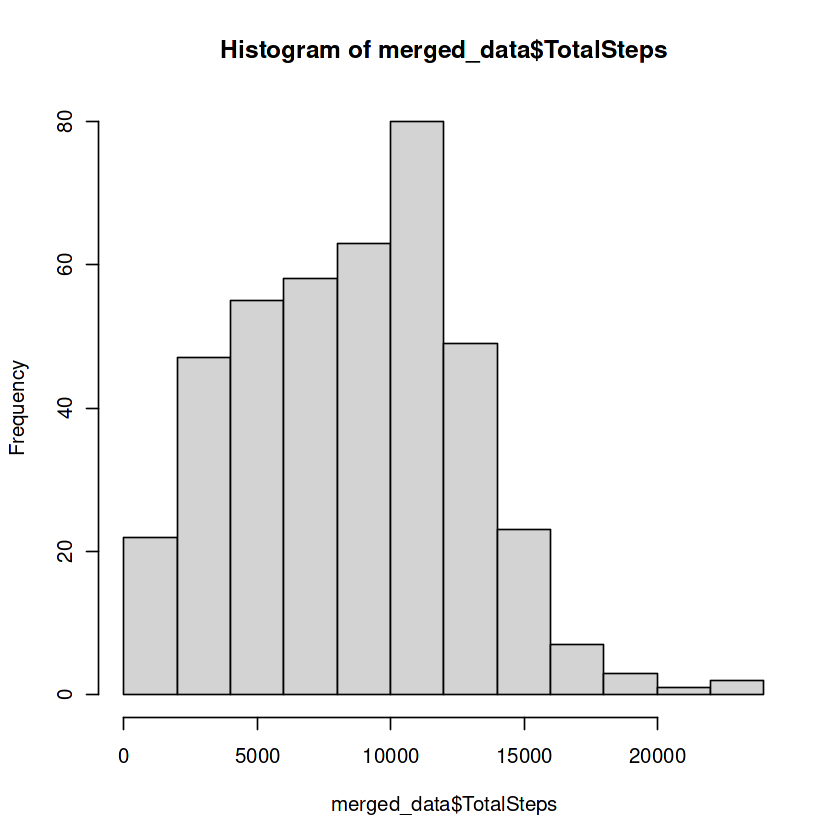

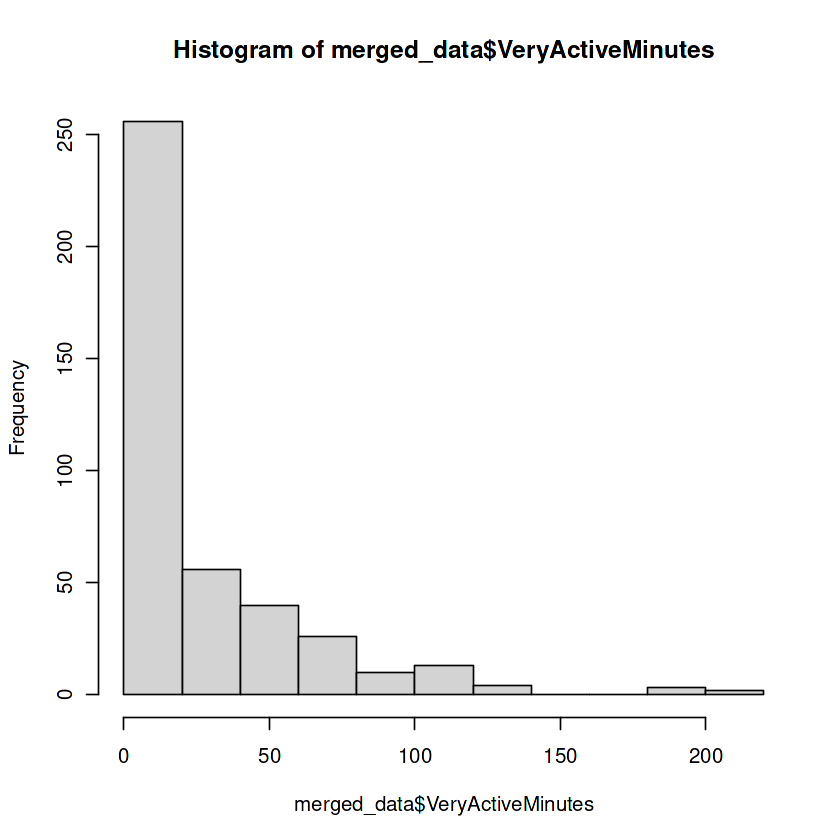

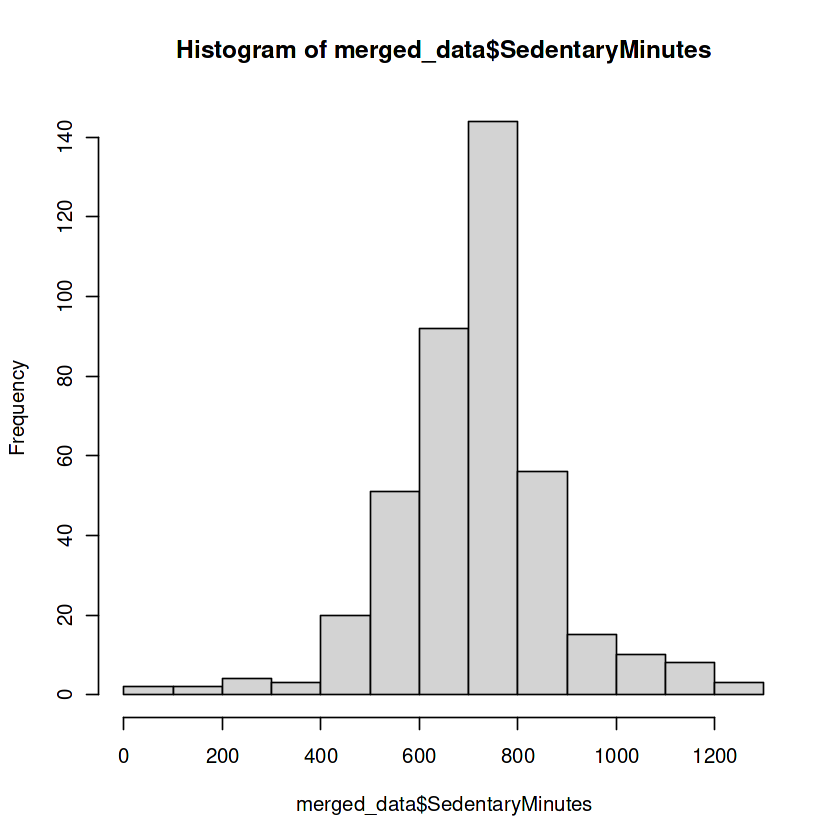

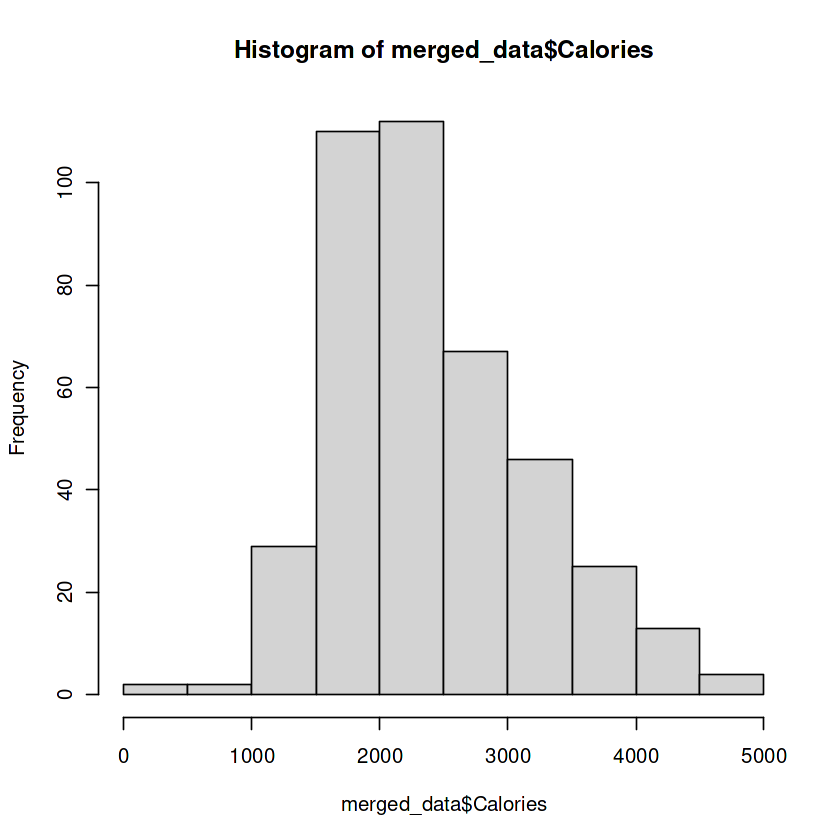

In [16]:
# Observe some general trends in the data:

hist(merged_data$TotalSteps)
hist(merged_data$VeryActiveMinutes)
hist(merged_data$SedentaryMinutes)
hist(merged_data$Calories)

In [17]:
# Check the statistical summary:

merged_data %>%
  select(TotalSteps, TotalDistance, VeryActiveDistance, ModeratelyActiveDistance, 
         LightActiveDistance) %>%
  summary()

merged_data %>%
  select(VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes, 
         SedentaryMinutes, Calories) %>%
  summary()

merged_data %>%
  select(TotalMinutesAsleep, TotalTimeInBed) %>%
  summary()

   TotalSteps    TotalDistance    VeryActiveDistance ModeratelyActiveDistance
 Min.   :   17   Min.   : 0.010   Min.   : 0.000     Min.   :0.0000          
 1st Qu.: 5189   1st Qu.: 3.592   1st Qu.: 0.000     1st Qu.:0.0000          
 Median : 8913   Median : 6.270   Median : 0.570     Median :0.4200          
 Mean   : 8515   Mean   : 6.012   Mean   : 1.446     Mean   :0.7439          
 3rd Qu.:11370   3rd Qu.: 8.005   3rd Qu.: 2.360     3rd Qu.:1.0375          
 Max.   :22770   Max.   :17.540   Max.   :12.540     Max.   :6.4800          
 LightActiveDistance
 Min.   :0.010      
 1st Qu.:2.540      
 Median :3.665      
 Mean   :3.791      
 3rd Qu.:4.918      
 Max.   :9.480      

 VeryActiveMinutes FairlyActiveMinutes LightlyActiveMinutes SedentaryMinutes
 Min.   :  0.00    Min.   :  0.00      Min.   :  2.0        Min.   :   0.0  
 1st Qu.:  0.00    1st Qu.:  0.00      1st Qu.:158.0        1st Qu.: 631.2  
 Median :  9.00    Median : 11.00      Median :208.0        Median : 717.0  
 Mean   : 25.05    Mean   : 17.92      Mean   :216.5        Mean   : 712.1  
 3rd Qu.: 38.00    3rd Qu.: 26.75      3rd Qu.:263.0        3rd Qu.: 782.8  
 Max.   :210.00    Max.   :143.00      Max.   :518.0        Max.   :1265.0  
    Calories   
 Min.   : 257  
 1st Qu.:1841  
 Median :2207  
 Mean   :2389  
 3rd Qu.:2920  
 Max.   :4900  

 TotalMinutesAsleep TotalTimeInBed 
 Min.   : 58.0      Min.   : 61.0  
 1st Qu.:361.0      1st Qu.:403.8  
 Median :432.5      Median :463.0  
 Mean   :419.2      Mean   :458.5  
 3rd Qu.:490.0      3rd Qu.:526.0  
 Max.   :796.0      Max.   :961.0  

Observations:
1. Average sedentary minutes were at 955.2 minutes or 16 hours.
2. Average very active minutes and fairly active minutes were at 23.04 minutes 14.79 minutes and respectively.
3. Average lightly active minutes were at 210.3 minutes or 3.5 hours.
4. The average amount of calories burnt per day was around 2362 kcal.


Conclusions:
1. Participants were largely inactive throughout the day.
2. Participants spent a low amount of time exercising.
3. Participants are unlikely to take part in vigorous activities.

# 6. Visualization

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


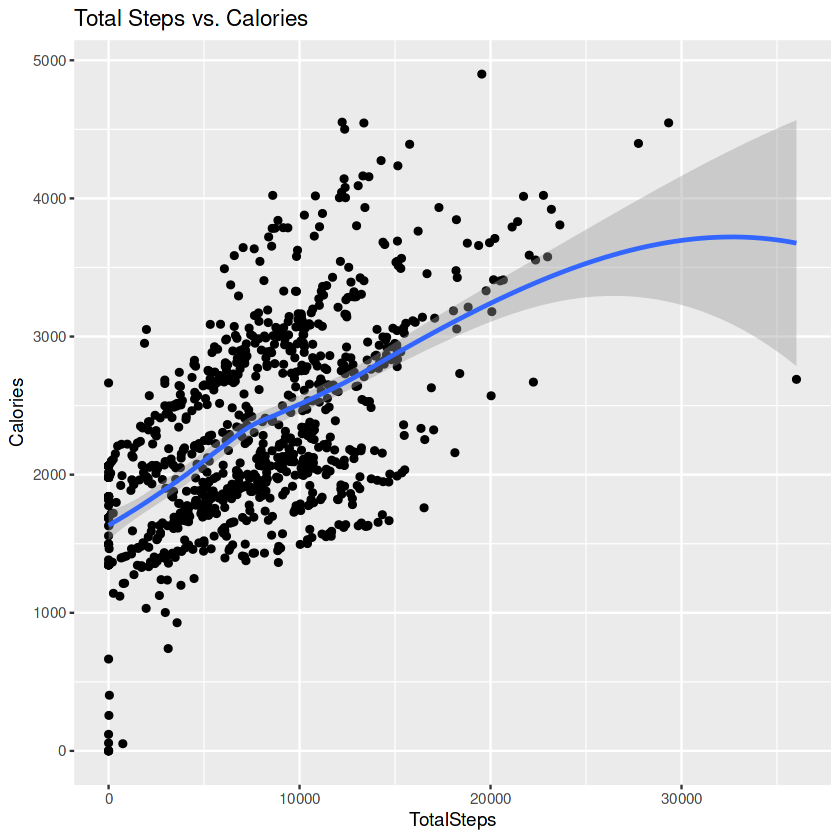

In [18]:
ggplot(data=activity, aes(x=TotalSteps, y=Calories)) + 
  geom_point() + geom_smooth() + labs(title="Total Steps vs. Calories")

Conclusion:
1. There is positive correlation between Total Steps and Calories, which is obvious - the more active we are, the more calories we burn.

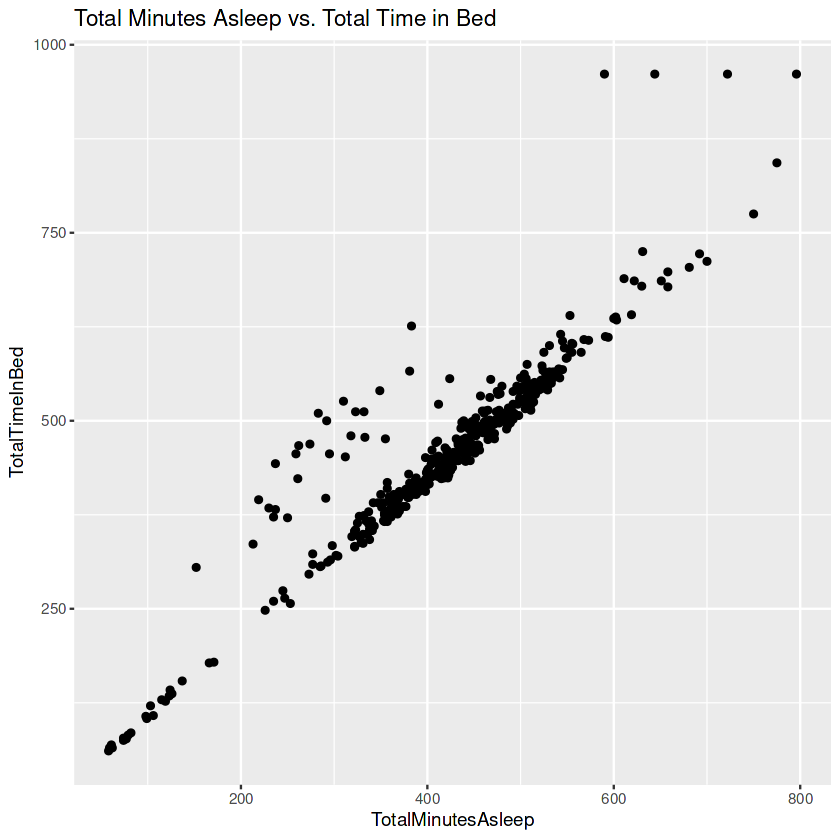

In [19]:
ggplot(data=sleep, aes(x=TotalMinutesAsleep, y=TotalTimeInBed)) + 
  geom_point()+ labs(title="Total Minutes Asleep vs. Total Time in Bed")

Conclusion:
1. the relationship between Total Minutes Asleep and Total Time in Bed looks linear. So if the Bellabeat users want to improve their sleep, they should consider using notification to go to sleep.

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


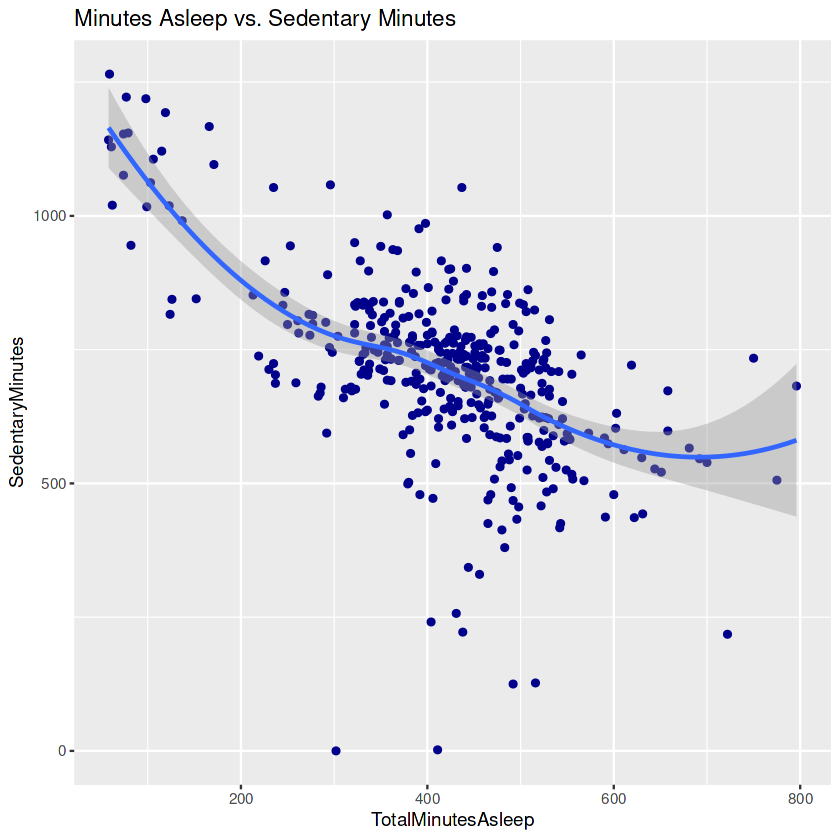

In [20]:
ggplot(data=merged_data, aes(x=TotalMinutesAsleep, y=SedentaryMinutes)) + 
geom_point(color='darkblue') + geom_smooth() +
  labs(title="Minutes Asleep vs. Sedentary Minutes")

Conclusion:
1. Here we can clearly see the negative relationship between Sedentary Minutes and Sleep time.

2. As an idea: if Bellabeat users want to improve their sleep, Bellabeat app can recommend reducing sedentary time.

3. Keep in mind that we need to support this insights with more data, because correlation between some data doesn’t mean causation.

# 7. Recommendations 

**Insights that would help influence Bellabeat marketing strategy**:

1. Average total steps per day are 7638 which a little bit less for having health benefits for according to the CDC research. They found that taking 8,000 steps per day was associated with a 51% lower risk for all-cause mortality (or death from all causes). Taking 12,000 steps per day was associated with a 65% lower risk compared with taking 4,000 steps. Bellabeat can encourage people to take at least 8 000 explaining the benefits for their health.

2. If users want to lose weight, it’s probably a good idea to control daily calorie consumption. Bellabeat can suggest some ideas for low-calorie lunch and dinner.

3. If users want to improve their sleep, Bellabeat should consider using app notifications to go to bed.

4. As an idea: if users want to improve their sleep, the Bellabeat app can recommend reducing sedentary time.

*Thank you for your interest to my project!*

*I would appreciate any comments and recommendations for improvement!*